## Restaurant Recommendation Clustering

Using the Yelp Business Dataset, this notebook contains a recommendation system based on location, in this ocassion I used Vegas because is the city with the best ranked restaurants in the data set. . 

In [1]:
import pandas as pd 
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
df.head()

business_id                             name  \
0  1SWheh84yJXfytovILXOAQ       Arizona Biltmore Golf Club   
1  QXAEGFB4oINsVuTFxEYKFQ       Emerald Chinese Restaurant   
2  gnKjwL_1w79qoiV3IC_xQQ      Musashi Japanese Restaurant   
3  xvX2CttrVhyG2z1dFg_0xw  Farmers Insurance - Paul Lorenz   
4  HhyxOkGAM07SRYtlQ4wMFQ              Queen City Plumbing   

                          address         city state postal_code   latitude  \
0     2818 E Camino Acequia Drive      Phoenix    AZ       85016  33.522143   
1            30 Eglinton Avenue W  Mississauga    ON     L5R 3E7  43.605499   
2       10110 Johnston Rd, Ste 15    Charlotte    NC       28210  35.092564   
3   15655 W Roosevelt St, Ste 237     Goodyear    AZ       85338  33.455613   
4  4209 Stuart Andrew Blvd, Ste F    Charlotte    NC       28217  35.190012   

    longitude  stars  review_count  is_open  \
0 -112.018481    3.0             5        0   
1  -79.652289    2.5           128        1   
2  -80.859132    4.0           170        1   
3 -112.395596    5.0             3        1   
4  -80.887223    4.0             4        1   

                                          attributes  \
0                           {'GoodForKids': 'False'}   
1  {'RestaurantsReservations': 'True', 'GoodForMe...   
2  {'GoodForKids': 'True', 'NoiseLevel': 'u'avera...   
3                                               None   
4  {'BusinessAcceptsBitcoin': 'False', 'ByAppoint...   

                                          categories  \
0                                  Golf, Active Life   
1  Specialty Food, Restaurants, Dim Sum, Imported...   
2                  Sushi Bars, Restaurants, Japanese   
3                      Insurance, Financial Services   
4  Plumbing, Shopping, Local Services, Home Servi...   

                                               hours  
0                                               None  
1  {'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...  
2  {'Monday': '17:30-21:30', 'Wednesday': '17:30-...  
3  {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...  
4  {'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...

In [3]:
df['Restaurants'] = df['categories'].str.contains('Restaurants')
df_restaurants = df.loc[df.Restaurants == True]
lasVegas = df_restaurants[df_restaurants.state == 'NV']
coords = lasVegas[['longitude','latitude']]

distortions = []
K = range(1, 25)
for k in K:
    kmeansModel = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

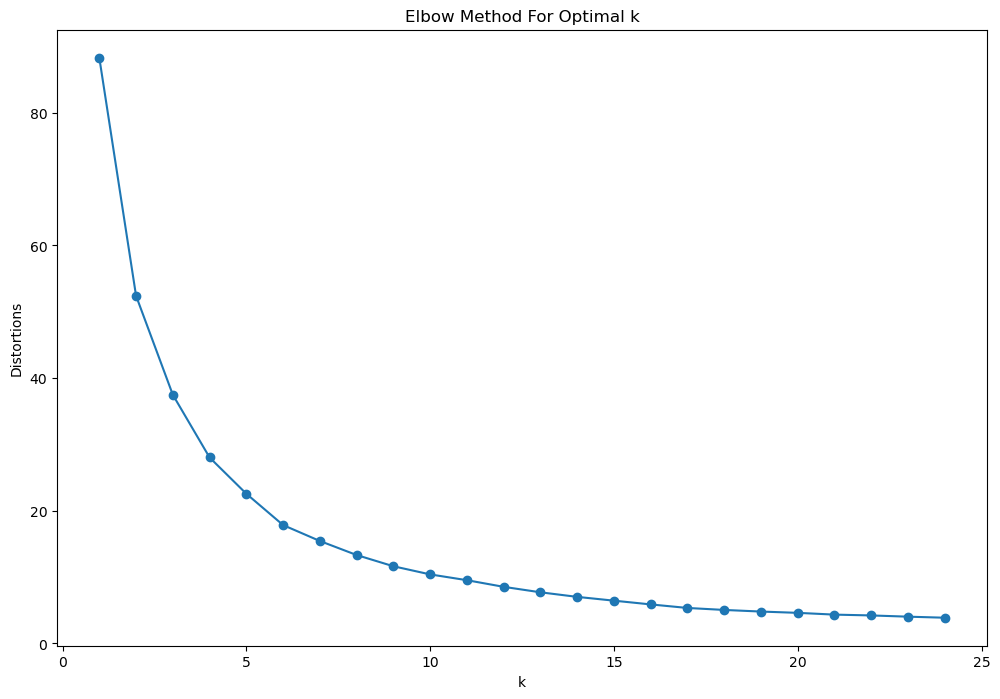

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
sil = []
kmax = 50

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(coords)
    sil.append(silhouette_score(coords, labels, metric='euclidean'))

sil

[0.38400973051084614,
 0.3666865477870314,
 0.39578695384567303,
 0.3889928471944808,
 0.4097253856987941,
 0.4174581273174104,
 0.4247077426486673,
 0.4047322116865822,
 0.4082317821669315,
 0.40874895123327254,
 0.421778309498572,
 0.4249447563142575,
 0.4338012087310803,
 0.4328593819359964,
 0.43757432500650595,
 0.44597968826256024,
 0.4421347574284329,
 0.4409898213503951,
 0.4405352486934573,
 0.44140972596015277,
 0.4397478794855316,
 0.44036460934362626,
 0.44015242022533113,
 0.42757639592468216,
 0.4243303924760117,
 0.41811490969033466,
 0.4289090899003365,
 0.43702296195039003,
 0.43985268422493085,
 0.42993693253246074,
 0.4253717088836697,
 0.43721922737940905,
 0.4302625985723898,
 0.4403744954418542,
 0.4378231615403917,
 0.43920680073726037,
 0.4502563978357769,
 0.45212873056435415,
 0.4373235849842134,
 0.4494160412217362,
 0.4465744712948603,
 0.45315260025671883,
 0.4500517830845401,
 0.4381962568088461,
 0.45738035127736426,
 0.4535623322711399,
 0.45559759810317

In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans.fit(coords)
y = kmeans.labels_

print("k = 5", " silhouette_score ", silhouette_score(coords, y, metric='euclidean', random_state=42))

k = 5  silhouette_score  0.3889928471944808


In [7]:
lasVegas['cluster'] = kmeans.predict(lasVegas[['longitude','latitude']])
lasVegas.head()

C:\Users\heuni\AppData\Local\Temp\ipykernel_11580\403706406.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



business_id                                 name  \
17   PZ-LZzSlhSe9utkQYU8pFg           Carluccio's Tivoli Gardens   
25   tstimHoMcYbkSC4eBA1wEg  Maria's Mexican Restaurant & Bakery   
75   kANF0dbeoW34s2vwh6Umfw                          Dairy Queen   
111  X8mtoSxY8whtmbDlj0D3Aw                Imperial Asian Buffet   
135  bJP4l_BGq2CudEu0m-wNjg             Artisan Fine Dining Room   

                              address       city state postal_code   latitude  \
17       1775 E Tropicana Ave, Ste 29  Las Vegas    NV       89119  36.100016   
25              6055 E Lake Mead Blvd  Las Vegas    NV       89156  36.195615   
75            6125 Spring Mountain Rd  Las Vegas    NV       89146  36.125031   
111                  4343 N Rancho Dr  Las Vegas    NV       89030  36.238596   
135  Artisan Hotel, 1501 W Sahara Ave  Las Vegas    NV       89102  36.143672   

      longitude  stars  review_count  is_open  \
17  -115.128529    4.0            40        0   
25  -115.040529    4.5           184        1   
75  -115.225620    2.0            33        0   
111 -115.233331    2.0             4        1   
135 -115.169792    2.0             3        0   

                                            attributes  \
17   {'OutdoorSeating': 'False', 'BusinessAcceptsCr...   
25   {'BikeParking': 'True', 'BusinessParking': '{'...   
75   {'RestaurantsPriceRange2': '1', 'Ambience': '{...   
111                                               None   
135  {'RestaurantsAttire': ''dressy'', 'Corkage': '...   

                                            categories  \
17                                Restaurants, Italian   
25   Mexican, Restaurants, Patisserie/Cake Shop, Fo...   
75   Fast Food, Food, Restaurants, Ice Cream & Froz...   
111                               Restaurants, Chinese   
135        Restaurants, Pizza, Italian, American (New)   

                                                 hours Restaurants  cluster  
17                                                None        True        0  
25   {'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...        True        1  
75                                                None        True        0  
111                                               None        True        3  
135  {'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...        True        0

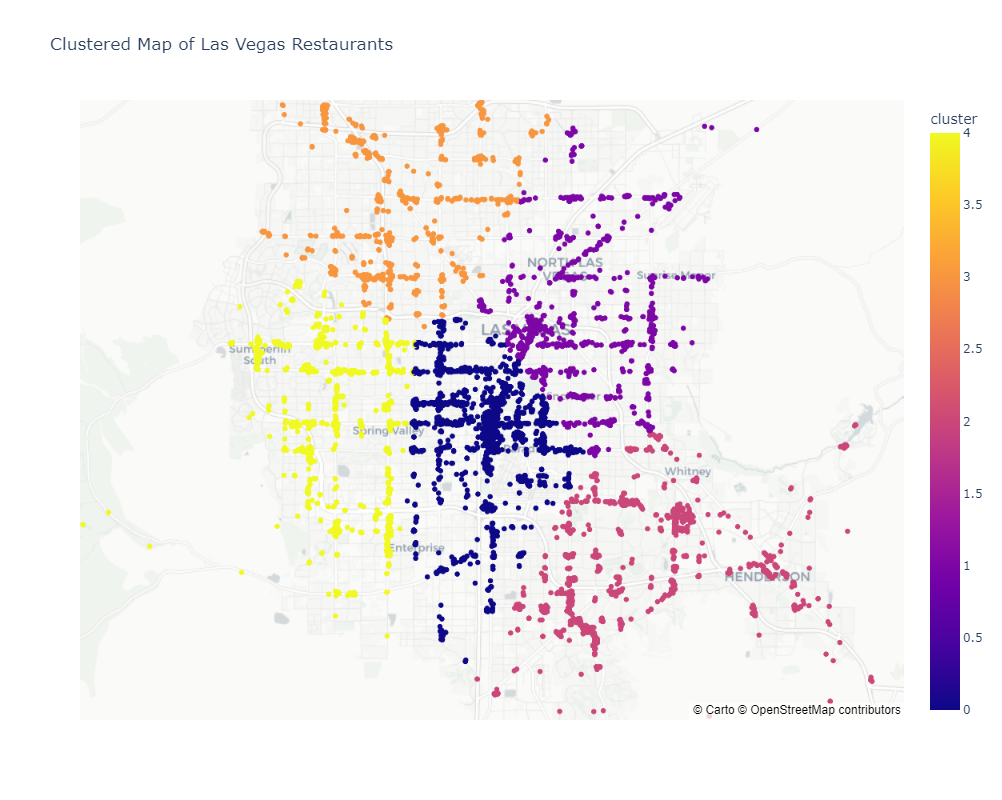

In [8]:
fig = px.scatter_mapbox(lasVegas, 
                        lat='latitude', 
                        lon='longitude', 
                        color='cluster',
                        size_max=15,
                        zoom=10,
                        mapbox_style="carto-positron",
                        title="Clustered Map of Las Vegas Restaurants")
fig.update_layout(width=600, height=800)
fig.show()

## Location Restaurant Recommendation

In [9]:
top_restaurants_lasVegas = lasVegas.sort_values(by=['review_count', 'stars'], ascending=False)
top_restaurants_lasVegas.head()

business_id                 name                address  \
82250   4JNXUYY8wbaaDmk3BPzlWw         Mon Ami Gabi  3655 Las Vegas Blvd S   
89206   RESDUcs7fIiihp38-d6_6g     Bacchanal Buffet  3570 S Las Vegas Blvd   
35199   K7lWdNUhCbcnEvI0NhGewg         Wicked Spoon  3708 Las Vegas Blvd S   
58852   f4x1YBxkLrZg652xt2KR5g   Hash House A Go Go    3535 Las Vegas Blvd   
141820  cYwJA2A6I12KNkm2rtXd5g  Gordon Ramsay BurGR  3667 Las Vegas Blvd S   

             city state postal_code   latitude   longitude  stars  \
82250   Las Vegas    NV       89109  36.112859 -115.172434    4.0   
89206   Las Vegas    NV       89109  36.116113 -115.176222    4.0   
35199   Las Vegas    NV       89109  36.109550 -115.176155    3.5   
58852   Las Vegas    NV       89109  36.118181 -115.171580    4.0   
141820  Las Vegas    NV       89109  36.110724 -115.172169    4.0   

        review_count  is_open  \
82250           8348        1   
89206           8339        1   
35199           6708        1   
58852           5763        1   
141820          5484        0   

                                               attributes  \
82250   {'Corkage': 'True', 'RestaurantsDelivery': 'Fa...   
89206   {'NoiseLevel': 'u'average'', 'HasTV': 'False',...   
35199   {'GoodForKids': 'True', 'RestaurantsPriceRange...   
58852   {'BusinessAcceptsCreditCards': 'True', 'Restau...   
141820  {'RestaurantsGoodForGroups': 'True', 'Alcohol'...   

                                               categories  \
82250   Food, French, Breakfast & Brunch, Restaurants,...   
89206   Restaurants, Buffets, Sandwiches, Food, Breakf...   
35199            Buffets, Breakfast & Brunch, Restaurants   
58852   Breakfast & Brunch, Food, Restaurants, America...   
141820       Restaurants, Burgers, American (Traditional)   

                                                    hours Restaurants  cluster  
82250   {'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...        True        0  
89206   {'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...        True        0  
35199   {'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...        True        0  
58852   {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...        True        0  
141820  {'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...        True        0

In [33]:
def recommend_restaurants(df, longitude, latitude, kmeans_model):
    cluster = kmeans_model.predict(np.array([longitude, latitude]).reshape(1, -1))[0]
    print("Cluster:", cluster)
    recommended_restaurants = df[df['cluster'] == cluster].iloc[0:5][['name', 'latitude', 'longitude']]
    return recommended_restaurants

# Assuming kmeans is your fitted k-means clustering model
recommended1 = recommend_restaurants(top_restaurants_lasVegas, -115.1891691, 36.1017316, kmeans)
print(recommended1)

recommended2 = recommend_restaurants(top_restaurants_lasVegas, -115.2798544, 36.0842838, kmeans)
print(recommended2)

recommended3 = recommend_restaurants(top_restaurants_lasVegas, -115.082821, 36.155011, kmeans)
print(recommended3)

Cluster: 0
                       name   latitude   longitude
82250          Mon Ami Gabi  36.112859 -115.172434
89206      Bacchanal Buffet  36.116113 -115.176222
35199          Wicked Spoon  36.109550 -115.176155
58852    Hash House A Go Go  36.118181 -115.171580
141820  Gordon Ramsay BurGR  36.110724 -115.172169
Cluster: 4
                                    name   latitude   longitude
131069                Hash House A Go Go  36.144713 -115.240092
116890                        Echo & Rig  36.166576 -115.286232
42288       Red Rock Casino Resort & Spa  36.156413 -115.332847
11169   Juan's Flaming Fajitas & Cantina  36.100509 -115.302689
9191                          Honey Salt  36.160577 -115.292996
Cluster: 1
                  name   latitude   longitude
111864   Lotus of Siam  36.143664 -115.141891
79764             Eat.  36.166900 -115.138977
127088      Pizza Rock  36.171618 -115.142267
55675   Carson Kitchen  36.167878 -115.140640
160676   Golden Nugget  36.169781 -115.145534


C:\Users\heuni\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

C:\Users\heuni\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

C:\Users\heuni\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



In [14]:
test_coordinates = {
    'user': [1, 2, 3], 
    'latitude' : [36.1017316, 36.0842838, 36.155011],
    'longitude' : [-115.1891691, -115.2798544, -115.082821],
}

test_df = pd.DataFrame(test_coordinates)
test_df

user   latitude   longitude
0     1  36.101732 -115.189169
1     2  36.084284 -115.279854
2     3  36.155011 -115.082821

In [15]:
user1 = test_df[test_df['user'] == 1]
user1

user   latitude   longitude
0     1  36.101732 -115.189169

In [35]:
from folium.plugins import MarkerCluster
def recommend_restaurants(df, longitude, latitude, kmeans_model):
    cluster = kmeans_model.predict(np.array([longitude, latitude]).reshape(1, -1))[0]
    recommended_restaurants = df[df['cluster'] == cluster].iloc[0:5][['name', 'latitude', 'longitude']]
    return recommended_restaurants

def visualize_recommendations(user, recommended_restaurants):
    map_center = [user['latitude'], user['longitude']]
    m = folium.Map(location=map_center, zoom_start=12)
    folium.Marker(location=map_center, popup=f"User {user['user_id']}").add_to(m)
    marker_cluster = MarkerCluster().add_to(m)
    for index, restaurant in recommended_restaurants.iterrows():
        folium.Marker([restaurant['latitude'], restaurant['longitude']],
                      popup=f"{restaurant['name']}").add_to(marker_cluster)

    return m

users = [
    {'user_id': 1, 'latitude': 36.1017316, 'longitude': -115.1891691},
    {'user_id': 2, 'latitude': 36.0842838, 'longitude': -115.2798544},
    {'user_id': 3, 'latitude': 36.155011, 'longitude': -115.082821},
]

for user in users:
    recommended_restaurants = recommend_restaurants(top_restaurants_lasVegas, user['longitude'], user['latitude'], kmeans)
    map_for_user = visualize_recommendations(user, recommended_restaurants)
    display(map_for_user)

C:\Users\heuni\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



C:\Users\heuni\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



C:\Users\heuni\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

